In [7]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from glob import glob

In [131]:
new = pd.read_csv('haystacks/2018-03-21_190104__0.txt', header=None, squeeze=True, index_col=0)
#pd.read_csv('foo.txt', header=None, squeeze=True, index_col=0))
new

0
sigma         20.928035265142732
dSNR                         5.0
HstackSize               1000000
NeedleSize                250000
NeedleType                  sine
StartSam                  429080
Name: 1, dtype: object

In [8]:
results = pd.read_csv('results/5db_results.txt', index_col=0)

In [14]:
results['dSNR'].mean()

5.0

In [116]:
str(b'FF8D628F224E5B02')[2:18]

'FF8D628F224E5B02'

In [117]:
int(results.iloc[3]['entropy_hex'][2:18], 16)

16583259407243934729

In [68]:
results.iloc[3]['entropy_hex']

"b'FF761EA3B8946445'"

In [69]:
int('FFEFC466EACE0DEF', 16)

18442174945410551279

In [70]:
[int(i[2:18], 16) for i in results['entropy_hex']]

[18414482818283232002,
 18441902684556062436,
 18419746186416034161,
 18407934215448716357,
 18406196764640764821,
 18437549508020773375,
 18440505866585223240,
 18442017109329010364,
 18413143654363282743,
 18438098002916495580,
 18442091682252146835,
 18441902632435499182,
 18442070392199942470,
 18441879110629174864,
 18441835464957541983,
 18442118587724113168,
 18442174945410551279,
 18442119401667060988,
 18442214320914293343,
 18441757790534024810]

(array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 2.]),
 array([0.89563882, 0.89746092, 0.89928302, 0.90110512, 0.90292722,
        0.90474932, 0.90657142, 0.90839352, 0.91021563, 0.91203773,
        0.91385983, 0.91568193, 0.91750403, 0.91932613, 0.92114823,
        0.92297033, 0.92479243, 0.92661453, 0.92843663, 0.93025873,
        0.93208083, 0.93390293, 0.93572503, 0.93754713, 0.93936923,
        0.94119133, 0.94301343, 0.94483553, 0.94665763, 0.94847973,
        0.95030183, 0.95212393, 0.95394604, 0.95576814, 0.95759024,
        0.95941234, 0.96123444, 0.96305654, 0.96487864, 0.96670074,
        0.96852284, 0.97034494, 0.97216704, 0.97398914, 0.97581124,
        0.97763334, 0.97945544, 0.98127754, 0.98309964, 0.98492174,
        0.98674384]),
 <a list of 50 Patch objects>)

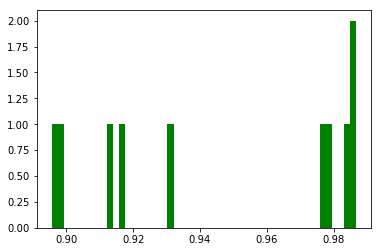

In [129]:
%timeit
plt.hist(results.loc[results['NeedleType'] == 'sine', 'norm_entropy'], bins=50, color='g')

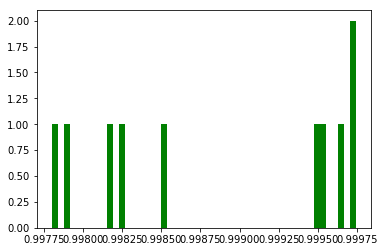

In [134]:
plt.hist(results[results.NeedleType == 'sine']['norm_entropy'], bins=50, color='g');

In [135]:
results.groupby('NeedleType')['norm_entropy'].describe()

,count,mean,std,min,25%,50%,75%,max
NeedleType,,,,,,,,
noise,10.0,0.999744,0.000009,0.999730,0.999737,0.999747,0.999749,0.999754
sine,10.0,0.998884,0.000819,0.997802,0.998197,0.999019,0.999629,0.999744


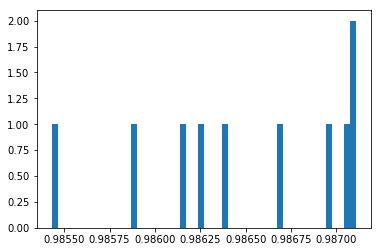

In [130]:
plt.hist(results[results.NeedleType == 'noise']['norm_entropy'], bins=50);

In [17]:
results.describe()

,HstackSize,NeedleSize,StartSam,dSNR,entropy,sigma
count,1000.0,1000.0,1000.0,1000.0,2000.0000,2.000000e+03
mean,1000000.0,250000.0,0.0,5.0,317045.1325,2.092804e+01
std,0.0,0.0,0.0,0.0,287813.8730,1.030545e-13
min,1000000.0,250000.0,0.0,5.0,0.0000,2.092804e+01
25%,1000000.0,250000.0,0.0,5.0,92669.5000,2.092804e+01
50%,1000000.0,250000.0,0.0,5.0,202099.5000,2.092804e+01
75%,1000000.0,250000.0,0.0,5.0,541028.7500,2.092804e+01
max,1000000.0,250000.0,0.0,5.0,995102.0000,2.092804e+01


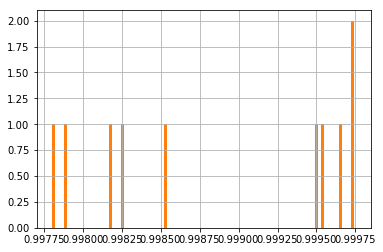

In [140]:
results.groupby('NeedleType')['norm_entropy'].hist(bins=100);

In [19]:
x = np.arange(10)
y = np.repeat(1, 3)
sig_start = 1
x[sig_start:sig_start+3] += y
x

array([0, 2, 3, 4, 4, 5, 6, 7, 8, 9])

In [ ]:
def run_scan(datafiles, txtfiles):
    for data, txt in zip(datafiles, txtfiles):
        output = run(["agnentro/tmp/agnentroscan", "i", data, "10", "5000", "1", "3"], stdout=PIPE)
        m = pd.read_csv(txt, header=None).T
        m.columns = m.iloc[0]
        m = m.reindex(m.index.drop(0))
        m['start_window'] = output.stdout.decode('utf-8')[0:16]
        m['entropy'] = int(output.stdout.decode('utf-8')[17:34], 16)
        m.to_csv(txt)

In [4]:
def plot_entropies(txtfiles):
    df_list = [pd.read_csv(file) for file in txtfiles]
    big_df = pd.concat(df_list)
    return big_df

In [5]:
pd.read_csv(all_txt[0])

NameError: name 'all_txt' is not defined

In [6]:
plot_entropies(all_txt)

NameError: name 'all_txt' is not defined

In [86]:
all_dat = sorted(glob('./haystacks/*.dat'))
all_txt = sorted(glob('./haystacks/*.txt'))
scan.run_scan(all_dat, all_txt)

In [ ]:
    #plot_entropies(textfiles)

In [79]:
g = pd.read_csv("./haystacks/2018-03-18_130701__1.txt", header=None).T
g.columns = g.iloc[0]
g = g.reindex(g.index.drop(0))
g

,dSNR,HstackSize,NeedleSize,NeedleType,StartSam
1,-30.236528831502945,1000000,250000,sine,283359


In [66]:
m = pd.read_csv("./haystacks/2018-03-18_130701__1.txt", header=None)
m = m.T
m.columns = m.iloc[0]
m = m.reindex(m.index.drop(0))
m['result'] = 4
m
#m.to_csv('newfile.txt')

,dSNR,HstackSize,NeedleSize,NeedleType,StartSam,result
1,-30.236528831502945,1000000,250000,sine,283359,4


In [69]:
q = pd.read_csv("newfile.txt", index_col=0)
q

,dSNR,HstackSize,NeedleSize,NeedleType,StartSam,result
1,-30.236529,1000000,250000,sine,283359,4


In [53]:
n = pd.read_csv("./haystacks/2018-03-18_130701__1.txt", header=None)
n.append(['Result':[4]])

SyntaxError: invalid syntax (<ipython-input-53-506bb4b1089a>, line 2)

In [36]:
q = pd.read_csv('file.txt', header=None)
q

,0,1
0,0,-30.236528831502945
1,1,1000000
2,2,250000
3,3,sine
4,4,283359


In [30]:
m[0]

0          dSNR
1    HstackSize
2    NeedleSize
3    NeedleType
4      StartSam
Name: 0, dtype: object

In [22]:
m.pivot(index = m.columns[, columns=m[0])

Vals                                                      \
Attr HstackSize NeedleSize NeedleType StartSam                 dSNR   
0          None       None       None     None  -30.236528831502945   
1       1000000       None       None     None                 None   
2          None     250000       None     None                 None   
3          None       None       sine     None                 None   
4          None       None       None   283359                 None   

          Vals1                                       
Attr HstackSize NeedleSize NeedleType StartSam  dSNR  
0          None       None       None     None   -20  
1           100       None       None     None  None  
2          None         25       None     None  None  
3          None       None       sine     None  None  
4          None       None       None       25  None

In [ ]:
#loads binary file
output_file = open("signal.dat","rb")
totsig = np.load(output_file)
output_file.close()

In [ ]:
%load_ext watermark
%watermark

In [ ]:

totsig = noise[:, 0]


In [ ]:
np.float(30)

In [ ]:
noise[:,0].mean()

In [137]:
dSNR = 29.18

sigma = 100*pow(3+pow(10,dSNR/np.float(20)),-1)
#guass = np.random.normal(0, scale=sigma, size=1000)

In [138]:
sigma

3.147228862966468

In [139]:
output_file = open('guass.dat', "wb")
np.save(output_file, guass.astype(np.int8))
output_file.close()

In [140]:
input_file = open('guass.dat',"rb")
quant_guass = np.load(input_file)
input_file.close()

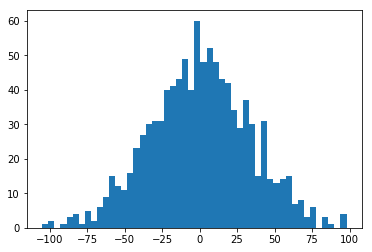

In [141]:
plt.hist(quant_guass, bins=50);

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=[20, 7])
#axs[0].hist(totsig, bins=501
axs[0].hist(quant_guass,  lw=2, fc=(1, 0.7, .2, 0.5), bins=10)

f, t, Sxx = signal.spectrogram(totsig)
axs[1].pcolormesh(t, f, Sxx)

axs[2].plot(totsig)
axs[2].plot(guass, color = 'orange', alpha=0.5)

plt.show()


In [ ]:
#Creating noise
SigSize = 200
nSig = 100
dSNR = np.repeat(30, nSig)
sigma = 100*pow(3+pow(10,dSNR/20.),-1)
noise = np.random.normal(0,sigma, (1000, 100))

In [ ]:
dSNR=(1, 15)
n=10
TotSize=1000

In [ ]:
dSNR[1]

In [ ]:
dSNR = np.random.uniform(low=dSNR[0], high=dSNR[1], size=n)
sigma = 100*pow(3+pow(10,dSNR/20.),-1)

#Creating noise matrix
signal = np.random.normal(0,sigma, size=(TotSize, n))
sigma

In [ ]:
signal.shape

In [ ]:
zero.shape

In [142]:
%%timeit
np.random.seed(121)

#Defining/computing variables
nSig = 100
TotSize = 1000000
SigSize = 250000
dSNR = np.repeat(20, nSig)
sigma = 100*pow(3+pow(10,dSNR/20.),-1)

#Creating noise matrix
noise = np.random.normal(0,sigma, (TotSize, nSig))

#Creating injected signal matrix
w = np.arange(SigSize)
w.shape
w = w.reshape(SigSize,1)

uni_mul = np.random.uniform(size=(1, nSig))
uni_add = np.repeat([np.random.uniform(size=nSig)], SigSize).reshape(nSig,SigSize).T
                            
y = sigma*pow(10,dSNR/20)*np.sin(2*np.pi*((w@uni_mul) + uni_add))

#Adding each signal at the correct place within the noise matrix
LastStartR= (TotSize-SigSize)/TotSize
StartR = np.random.uniform(0, LastStartR, size=nSig)
StartSam = np.round((StartR*TotSize).astype(float)).astype(int)

for sig in np.arange(nSig):
    noise[:,sig][StartSam[sig]:StartSam[sig]+SigSize] = y[0:SigSize, sig]

7.02 s ± 364 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
StartSam.shape

In [ ]:
noise.shape

In [ ]:
plt.plot(noise[:, 40])

In [ ]:
#Creating signal
np.random.seed(111)
SigSize = 200
nSig = 100
dSNR = np.repeat(30, nSig)
sigma = 100*pow(3+pow(10,dSNR/20.),-1)

w = np.arange(SigSize)
w.shape
w = w.reshape(SigSize,1)

uni_mul = np.random.uniform(size=(1, nSig))
uni_add = np.repeat([np.random.uniform(size=nSig)], SigSize).reshape(nSig,SigSize).T
                            
y = sigma*pow(10,dSNR/20)*np.sin(2*np.pi*((w@uni_mul) + uni_add))

In [ ]:
y.shape

In [ ]:
plt.plot(y[0:200, 0]);

In [ ]:
np.random.seed(111)
dSNR1=30
nSigSam1=200
x = sigma*pow(10,dSNR1/20)*np.sin(2*np.pi*(np.random.uniform()*np.arange(nSigSam1) + np.random.uniform()))

plt.plot(x);

In [ ]:
np.random.seed(111)
x[0:200]

In [ ]:
sig = np.zeros(np.array([10,2]))

In [ ]:
sig


In [ ]:
start = np.array([2, 4])
end = np.array([6, 9])

In [ ]:
sig[start:end]

In [ ]:
import pandas as pd
pd.Timestamp.today()

In [ ]:
'signals/[' + str(1) + ']_' + str(time.date()) + '_' + str(time.time())

In [ ]:
time = pd.Timestamp.today()
index = np.arange(10000)

In [ ]:
time = pd.Timestamp.today()
for sig_index in np.arange(n):
    '(' + str(sig_index) ') ' + str(time)
    

In [ ]:
'signals/(' + str(1) + ') ' + str(time)

In [ ]:
zer = np.zeros(shape=(5,10))

In [ ]:
qSNR = np.random.uniform(0, 10, size=10)


In [ ]:
np.random.seed(111)
dSNR = np.random.uniform(0, 10, size=10)
metadata = pd.DataFrame()
metadata['dSNR'] = pd.Series(dSNR)
metadata['qSNR'] = pd.Series(qSNR)
print(metadata.iloc[1])

In [ ]:
metadata.iloc[1].to_pickle('random.txt')

In [ ]:

x = pd.read_pickle('random.txt')

In [ ]:
x.index

In [ ]:
df = pd.DataFrame(t)
df

In [ ]:
pd.DataFrame([dSNR, qSNR ] )

In [ ]:
metadata = pd.DataFrame()
metadata['dSNR'] = pd.Series(dSNR)
metadata = pd.DataFrame()
metadata['dSNR'] = pd.Series(dSNR)
metadata

In [ ]:
metadata